In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Sessile Biomass

In [3]:
import pandas as pd
import os

base_dir = '.'  # current directory
all_runs = []

for folder_name in os.listdir(base_dir):
    if folder_name == 'base_': 
        continue
    folder_path = os.path.join(base_dir, folder_name)
    if os.path.isdir(folder_path):
        m_file = os.path.join(folder_path, 'Mtot_fraction.dat')
        eps_file = os.path.join(folder_path, 'EPS_fraction.dat')
        auto_file = os.path.join(folder_path, 'autoinducer.dat')
        if os.path.exists(m_file) and os.path.exists(eps_file):
            m_df = pd.read_csv(m_file, sep=r'\s+', header=None, names=['time', 'M'])
            eps_df = pd.read_csv(eps_file, sep=r'\s+', header=None, names=['time', 'EPS'])
            a_df = pd.read_csv(auto_file, sep=r'\s+', header=None, names=['time', 'A'])
            
            df = m_df.merge(eps_df, on='time')
            df = df.merge(a_df, on='time')
            df = df.rename(columns={'M': f'M_{folder_name}', 'EPS': f'EPS_{folder_name}', 'A': f'A_{folder_name}'})
            all_runs.append(df.set_index('time'))

combined_df = pd.concat(all_runs, axis=1)
df = combined_df.reset_index()  # time becomes a column again

print(df.head())


    time    M_base  EPS_base    A_base
0      0  0.000750  0.000500  0.000000
1  10000  0.000970  0.000527  0.035294
2  20000  0.001242  0.000550  0.045321
3  30000  0.001576  0.000575  0.057661
4  40000  0.001978  0.000604  0.072647


## EPS

## Merge

KeyError: 'M_base_autoinducer_0'

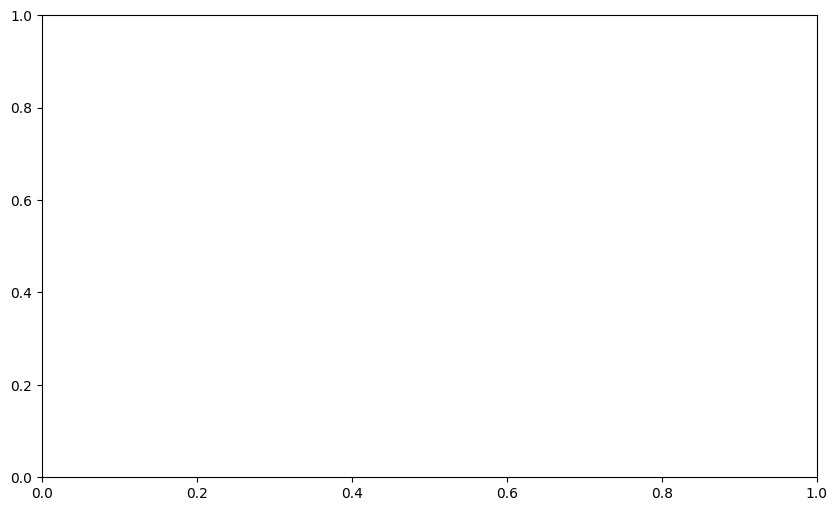

In [4]:
import matplotlib.pyplot as plt

# Convert time from seconds to days if desired
df['time_days'] = df['time'] / 86400  # optional

fig, ax = plt.subplots(figsize=(10,6))

# Define consistent colors for each condition
colors = {
    0: "cyan",
    10: "blue",
    20: "green",
    30: "purple",
    40: "red",
    50: "brown"
}

# Plot M (solid) and EPS (dashed) for each condition
for cond, color in colors.items():
    ax.plot(df['time_days'], df[f'M_base_autoinducer_{cond}'], 
            label=f'M {cond}', color=color, linewidth=2, linestyle='-')
#     ax.plot(df['time_days'], df[f'EPS_base_autoinducer_{cond}'], 
#             label=f'EPS {cond}', color=color, linewidth=2, linestyle='--')

ax.set_xlabel('Time (days)')
ax.set_ylabel('Concentration')
ax.set_title('M and EPS over Time under Different Conditions')
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()


NameError: name 'ax2' is not defined

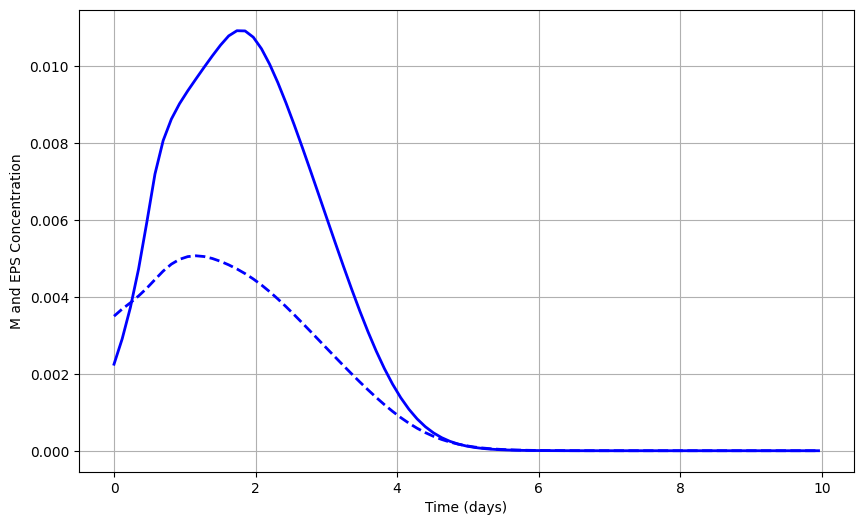

In [5]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10,6))

# Left axis: M and EPS
ax1.plot(df['time_days'], df['M_base']*3, label='M 10', color='blue', linewidth=2)
# ax1.plot(df['time_days'], df['M_enzyme_autoinducer_10'], label='M 10E', color='red', linewidth=2)


ax1.plot(df['time_days'], df['EPS_base']*7, label='EPS 10', color='blue', linewidth=2, linestyle='--')
# ax1.plot(df['time_days'], df['EPS_enzyme_autoinducer_10'], label='EPS 10E', color='red', linewidth=2, linestyle='--')

ax1.set_xlabel('Time (days)')
ax1.set_ylabel('M and EPS Concentration')
ax1.grid(True)

# # Right axis: Autoinducer A
# ax2 = ax1.twinx()
# ax2.plot(df['time_days'], df['A_base_autoinducer_10'], label='A 10', color='green', linewidth=2)
# ax2.plot(df['time_days'], df['A_enzyme_autoinducer_10'], label='A 10E', color='orange', linewidth=2)
# ax2.set_ylabel('Autoinducer (A)')

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title('M, EPS, and Autoinducer over Time under Different Conditions')
plt.tight_layout()
plt.show()


NameError: name 'ax2' is not defined

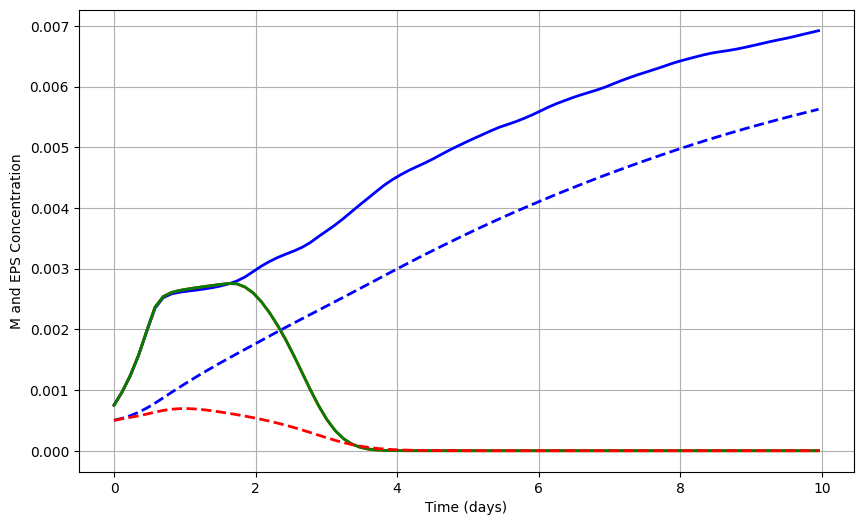

In [7]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10,6))

# Left axis: M and EPS
ax1.plot(df['time_days'], df['M_base_autoinducer_40'], label='M 40', color='blue', linewidth=2)
ax1.plot(df['time_days'], df['M_enzyme_autoinducer_40'], label='M 40E', color='red', linewidth=2)
ax1.plot(df['time_days'], df['M_enzyme_autoinducer_60'], label='M 60E', color='green', linewidth=2)


ax1.plot(df['time_days'], df['EPS_base_autoinducer_40'], label='EPS 40', color='blue', linewidth=2, linestyle='--')
ax1.plot(df['time_days'], df['EPS_enzyme_autoinducer_40'], label='EPS 40E', color='red', linewidth=2, linestyle='--')

ax1.set_xlabel('Time (days)')
ax1.set_ylabel('M and EPS Concentration')
ax1.grid(True)

# Right axis: Autoinducer A
# ax2 = ax1.twinx()
# ax2.plot(df['time_days'], df['A_base_autoinducer_40'], label='A 40', color='green', linewidth=2)
# ax2.plot(df['time_days'], df['A_enzyme_autoinducer_40'], label='A 40E', color='orange', linewidth=2)
# ax2.set_ylabel('Autoinducer (A)')

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title('M, EPS, and Autoinducer over Time under Different Conditions')
plt.tight_layout()
plt.show()


In [26]:

biomass_df = pd.read_csv('biomass_0.dat', 
                 sep=r'\s+',   
                 header=None, 
                 names=['time', 'B']) 

print(biomass_df.head())


FileNotFoundError: [Errno 2] No such file or directory: 'biomass_0.dat'

In [ ]:
plt.plot(biomass_df["time"] / (60*60*24), biomass_df["B"])
plt.xlabel("Days")
plt.ylabel("B")
plt.show()
